In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [79]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_speed = ''
sample_prior = '_mixed_prior'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)
print(sample_prefix)

12000-2000-3sigma_mixed_prior


In [24]:
pickle_path_suffix =  "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
underscore_suffix = ''
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix)
file_path = os.path.join(pickle_path+underscore_suffix, pickle_path_suffix+".pkl")
path_ini_file = os.path.join(pickle_path+underscore_suffix, "cosmos2020_farmer.ini")
if os.path.isdir(pickle_path):
    print(pickle_path)
else:
    print('No directory:',pickle_path)

D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150


# Load Measurement Pickle and Feed into Results/Plots

In [25]:
# Import saved stacking measurement
simstack_object = SimstackToolbox.import_saved_pickles(file_path)
simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)

In [26]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [27]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [28]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

# Load Saved MCMC Samples

In [29]:
samples_filename = '_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
print(samples_filename)
flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,samples_filename))
flat_samples_dict.keys()

mcmc_samples_1500-500-3sigma_mixed_prior_dict.pkl


dict_keys(['wavelengths', 'z_median', 'dz_median', 'm_median', 'ngals', 'y', 'yerr', 'mcmc_dict'])

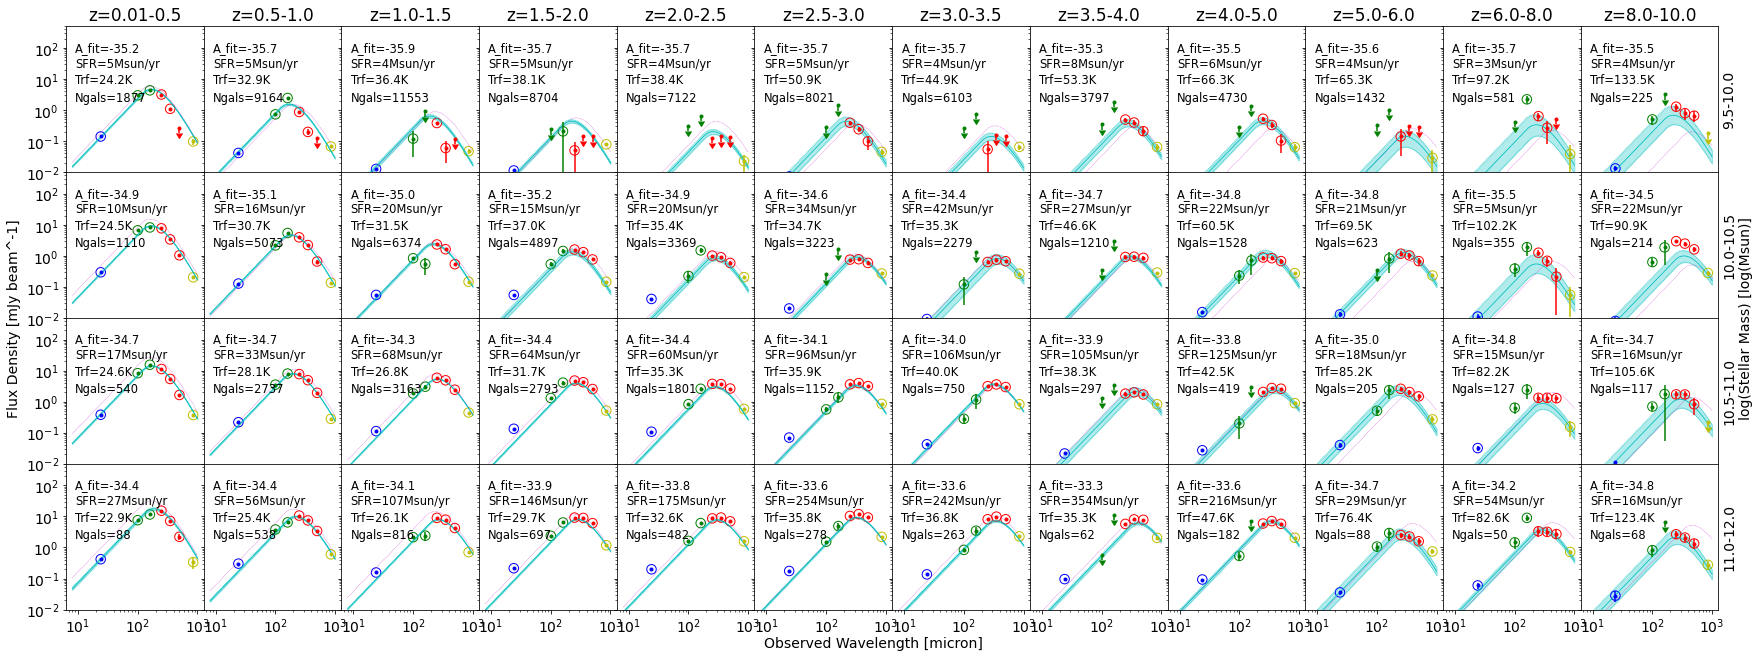

In [30]:
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'))

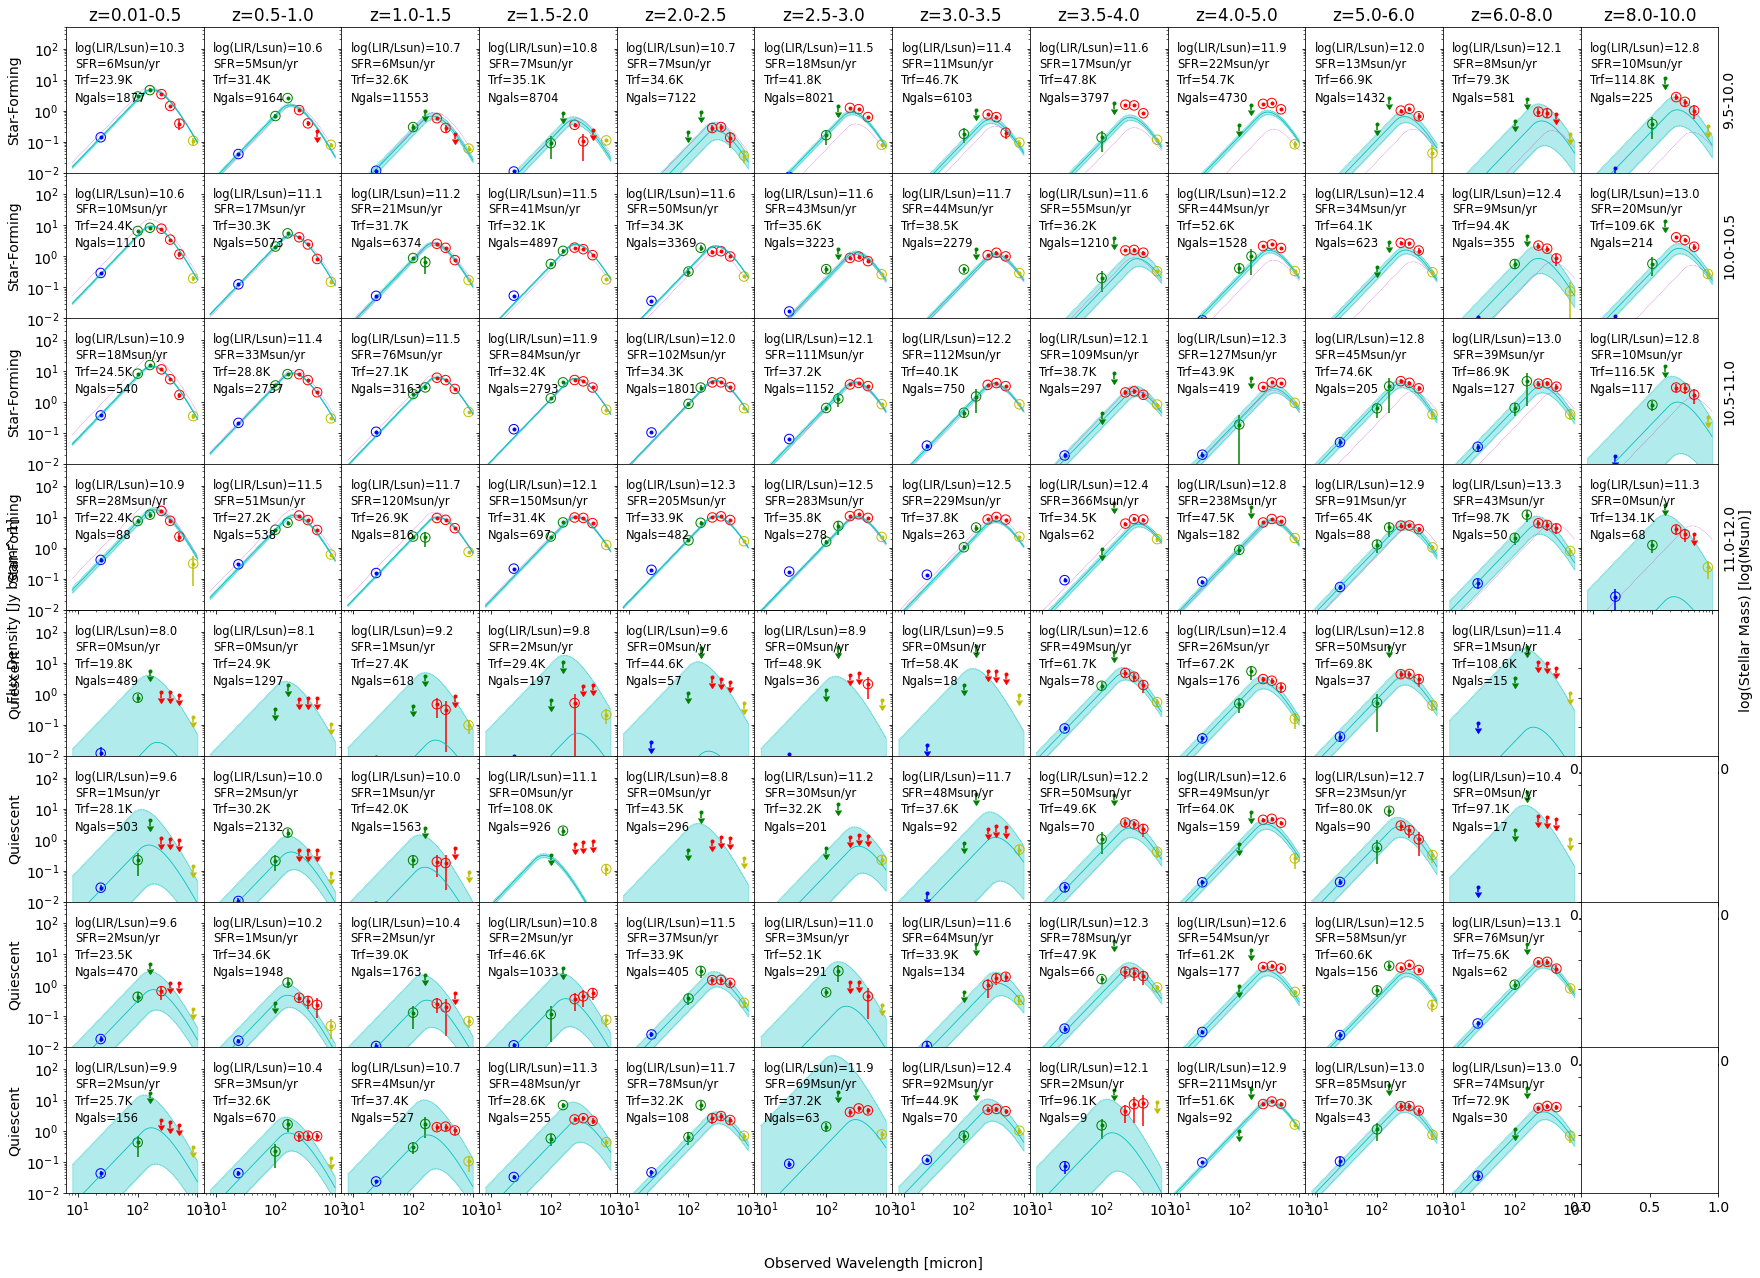

In [10]:
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None,  show_qt=True, errors=('25', '75'))

# Estimate Luminosity/SFR Density 

### Estimate LIR

In [31]:
# Estimate LIR from samples dict
min_detections = 2
lir_dict = simstack_object.get_lir_from_mcmc_samples(flat_samples_dict, min_detections=min_detections, include_qt=False)

In [32]:
# Save LIR results
lir_filename = '_'.join(['lir',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,lir_filename), lir_dict)
print('Saving', os.path.join(pickle_path,lir_filename))

Saving D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\lir_1500-500-3sigma_mixed_prior_dict.pkl


In [33]:
cosmos_area_deg2 = 1.6055  # deg2
lird_dict = simstack_object.estimate_luminosity_density(lir_dict, cosmos_area_deg2, include_qt=False)

In [34]:
# Save LIR Density results
lird_filename =  '_'.join(['lird',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,lird_filename), lird_dict)
print('Saving', os.path.join(pickle_path,lird_filename))

Saving D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\lird_1500-500-3sigma_mixed_prior_dict.pkl


In [35]:
# Estimate Total IR Luminosity Density Redshift
total_lird_dict = simstack_object.estimate_total_lird_array(lird_dict, include_qt=True)

In [36]:
# Save Total LIR Density results
tlird_filename =  '_'.join(['total_lird',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,tlird_filename), total_lird_dict)
print('Saving', os.path.join(pickle_path,tlird_filename))

Saving D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\total_lird_1500-500-3sigma_mixed_prior_dict.pkl


### Estimate SFR from rest-frame 850um

In [37]:
# Estimate SFR from samples dict
min_detections = 2
sfr_dict = simstack_object.get_mmol_from_mcmc_samples(flat_samples_dict, min_detections=min_detections, include_qt=False)

In [38]:
# Save SFR results
sfr_filename = '_'.join(['sfr',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,sfr_filename), sfr_dict)
print('Saving', os.path.join(pickle_path,sfr_filename))

Saving D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\sfr_1500-500-3sigma_mixed_prior_dict.pkl


In [40]:
sfrd_dict = simstack_object.estimate_sfr_density(sfr_dict, cosmos_area_deg2, include_qt=False)

In [41]:
# Save SFR Density results
sfrd_filename =  '_'.join(['sfrd',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,sfrd_filename), sfrd_dict)
print('Saving', os.path.join(pickle_path,sfrd_filename))

Saving D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\sfrd_1500-500-3sigma_mixed_prior_dict.pkl


In [42]:
# Estimate Total 850um SFR Density
total_sfrd_dict = simstack_object.estimate_total_sfrd_array(sfrd_dict, include_qt=False)

In [43]:
# Save Total LIR Density results
tsfrd_filename =  '_'.join(['total_sfrd',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,tsfrd_filename), total_sfrd_dict)
print('Saving', os.path.join(pickle_path,tsfrd_filename))

Saving D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\total_sfrd_1500-500-3sigma_mixed_prior_dict.pkl


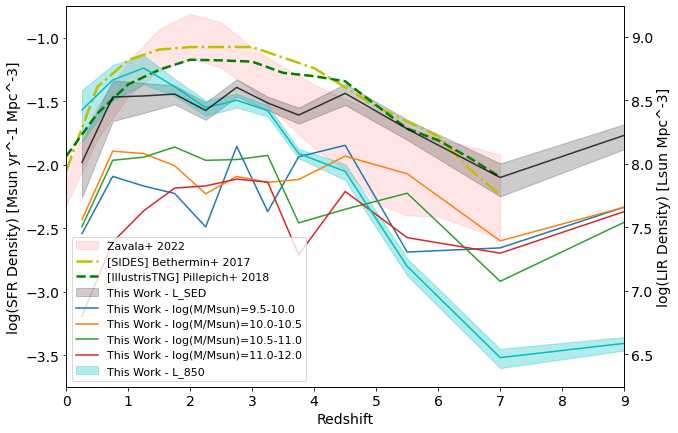

In [44]:
simstack_object.plot_total_sfrd(total_sfrd_dict)

# Estimate Dust Temperature

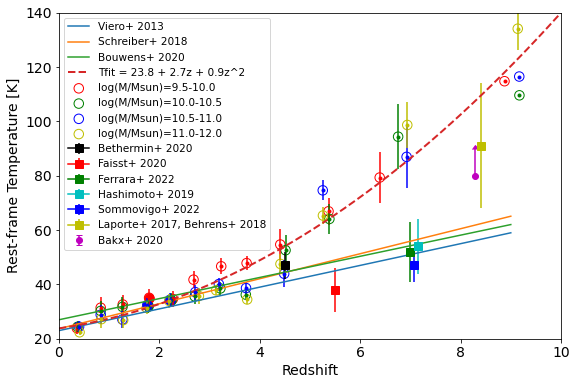

In [25]:
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1']
simstack_object.plot_rest_frame_temperature(lir_dict,  xlim=[0, 10], ylim=[2e1, 140], ylog=False, not_flat_prior=not_flat_prior)